# Random forest regression

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [140]:
df = pd.read_csv('./finalShort.csv')

In [141]:
df.head()

,Unnamed: 0,NDVI,time,Tree,NTree,NVege,dayTem,nightTem,dayClear,nightClear,Preci
0,0,0.8187,0.0,74.3125,12.3750,13.3125,4554.4375,6320.3125,154.7500,330.5625,0.601562
1,1,0.8214,0.0,66.1250,25.5000,8.3750,6387.2500,7214.0000,450.1875,812.2500,0.601562
2,7,0.8430,0.0,72.7500,2.8750,24.3750,6392.2500,8972.4375,587.6875,906.6875,0.601562
3,8,0.8419,0.0,75.3750,0.6250,24.0000,6399.1250,8094.6875,807.0625,1058.1250,0.601562
4,12,0.8315,0.0,65.0625,24.3125,10.6250,6446.4375,7196.2500,1100.1875,749.0625,0.601562


In [162]:
short = df[::50]

In [164]:
X = short.drop(['NDVI', 'Unnamed: 0','NVege'], axis=1)
y = short['NDVI']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
## normalize
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train )
X_test = scaler.transform( X_test )

In [146]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_test, y_test)

-6.987128867685932e-05

In [147]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_accuracy = evaluate(dummy_regr, X_test, y_test)

Model Performance
Average Error: 0.2014 degrees.
Accuracy = 36.32%.


In [165]:
base_model3 = RandomForestRegressor(n_estimators = 300, random_state = 42)
base_model3.fit(X_train, y_train)
base_accuracy3 = evaluate(base_model3, X_test, y_test)

Model Performance
Average Error: 0.0595 degrees.
Accuracy = 85.11%.


Feature ranking:
0. feature 1 (0.432265)
1. feature 2 (0.252051)
2. feature 7 (0.111940)
3. feature 3 (0.095323)
4. feature 4 (0.044131)
5. feature 5 (0.022361)
6. feature 6 (0.021135)
7. feature 0 (0.020794)


(-1, 8)

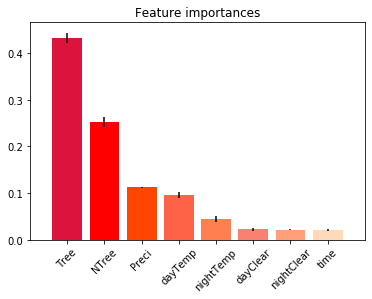

In [166]:
importances3 = base_model3.feature_importances_
std = np.std([tree.feature_importances_ for tree in base_model4.estimators_],
             axis=0)
indices = np.argsort(importances3)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f, indices[f], importances3[indices[f]]))
    
#             time	Tree	NTree	dayTem	nightTem	dayClear	nightClear	Preci
features = ['time', 'Tree','NTree', 'dayTemp','nightTemp', 'dayClear', 'nightClear', 'Preci']
features_new = [0]*len(features)
for i in range(len(features)):
    features_new[i] = features[indices[i]]
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
colors = ['crimson','r','orangered','tomato','coral', 'salmon','lightsalmon','peachpuff','linen']
plt.bar(range(X_train.shape[1]), importances3[indices],
       color=colors, yerr=std[indices], align="center")

plt.xticks(range(X_train.shape[1]), features_new,rotation=45)

plt.xlim([-1, X_train.shape[1]])


In [167]:
from sklearn.metrics import r2_score
y_pred = base_model3.predict(X_test)
r2_score(y_test, y_pred)

0.8698585104020629

In [160]:
y_pred = base_model3.predict(X_test)

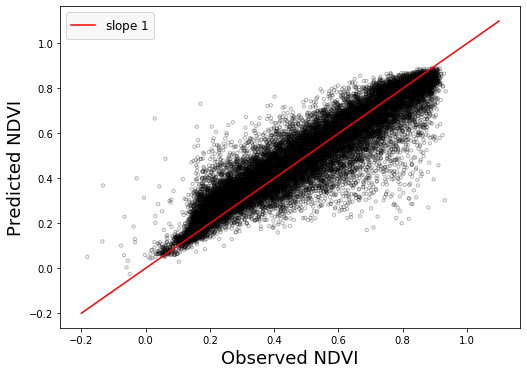

In [161]:
# scatterplot
%matplotlib inline

figwidth       = 7
figheight      = 5
lineWidth      = 2
textFontSize   = 15
gcafontSize    = 12
markerSize     = 4
labelFontSize  = 18
tickSize       = 12

fig = plt.figure(1, figsize=(figwidth,figheight))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(y_test, y_pred, alpha=0.3, marker = 'o',  color = 'k', facecolors='none', s=10)



fig.tight_layout()
xline = np.arange(-0.2,1.2,0.1)
yline = xline
plt.plot(xline,yline, color = 'r',label = r"slope $1$")

plt.xlabel("Observed NDVI",fontsize=labelFontSize)
plt.ylabel("Predicted NDVI",fontsize=labelFontSize)
plt.legend(loc=2,fontsize=gcafontSize,facecolor = 'whitesmoke')